In [3]:
import scanpy as scp
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt
import pandas as pd
import pynndescent as pynn
import functions as f
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import seaborn as sns
from sklearn.metrics import confusion_matrix 

In [4]:
data = scp.datasets.pbmc3k_processed()
labels = data.obs['louvain'].values.tolist()
clusts = ['CD4 T cells', 'CD14+ Monocytes', 'B cells', 'CD8 T cells', 'NK cells', 'FCGR3A+ Monocytes', 'Dendritic cells', 'Megakaryocytes']

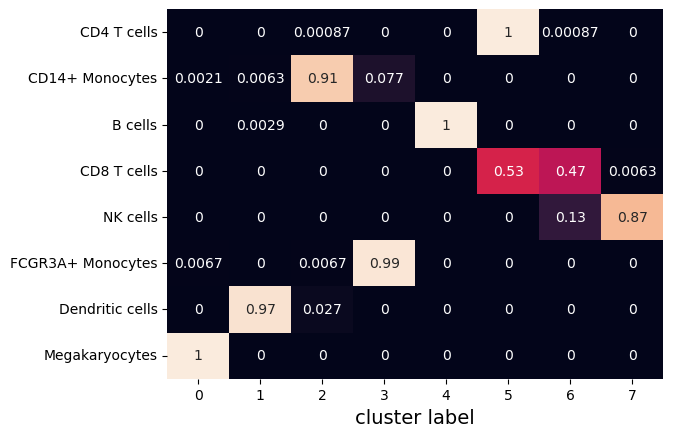

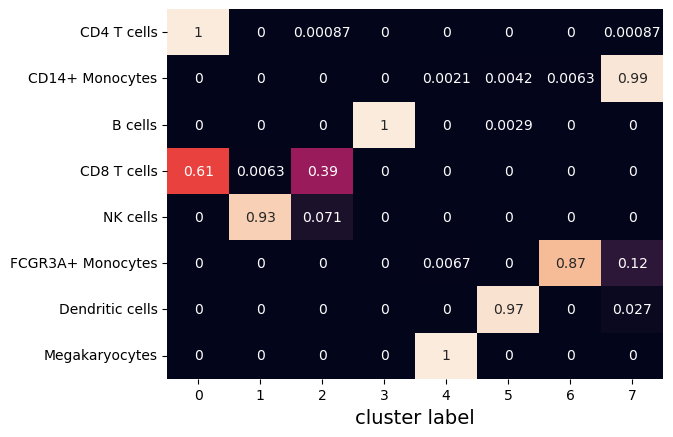

In [33]:
#seed = np.random.randint(2**32 - 1)
seed = 336224682
#seed = None
np.random.seed(seed)
#scp.pp.pca(data, n_comps=30) 

X=data.obsm['X_pca']
I=pynn.NNDescent(X, n_neighbors=30)
ind,dist=I.query(X,k=15)
nn = f.nn_graph_directed(ind, dist)

nn = nn + nn.T
T = f.getTransitionMatrix(nn)
dMap, eVals = f.getDiffMap(T)
specGap = [eVals[i]-eVals[i+1] for i in range(len(eVals)-1)]

scp.pp.neighbors(data, method = 'gauss')
scp.tl.diffmap(data)
dmap2 = data.obsm['X_diffmap']

X = dMap[:,1:7]
dist = pdist(X, metric = 'euclidean')
link = linkage(dist, method = 'ward')

X_scp = dmap2[:,1:7]
dist_scp = pdist(X_scp, metric = 'euclidean')
link_scp = linkage(dist_scp, method = 'ward')

clust_me = fcluster(link, criterion = 'maxclust', t=8)
clust_me = [i - 1 for i in clust_me]
clust_scp = fcluster(link_scp, criterion = 'maxclust', t=8)
clust_scp = [i -1 for i in clust_scp]

label_int = [clusts.index(c) for c in labels]
cm_me = confusion_matrix(label_int, clust_me, normalize = 'true')
sns.heatmap(cm_me, annot=True, yticklabels = clusts, cbar = False)
plt.xlabel('cluster label', fontsize = 14)
plt.show()

cm_scp = confusion_matrix(label_int, clust_scp, normalize = 'true')
sns.heatmap(cm_scp, annot=True, yticklabels=clusts, cbar = False)
plt.xlabel('cluster label', fontsize = 14)
plt.show()

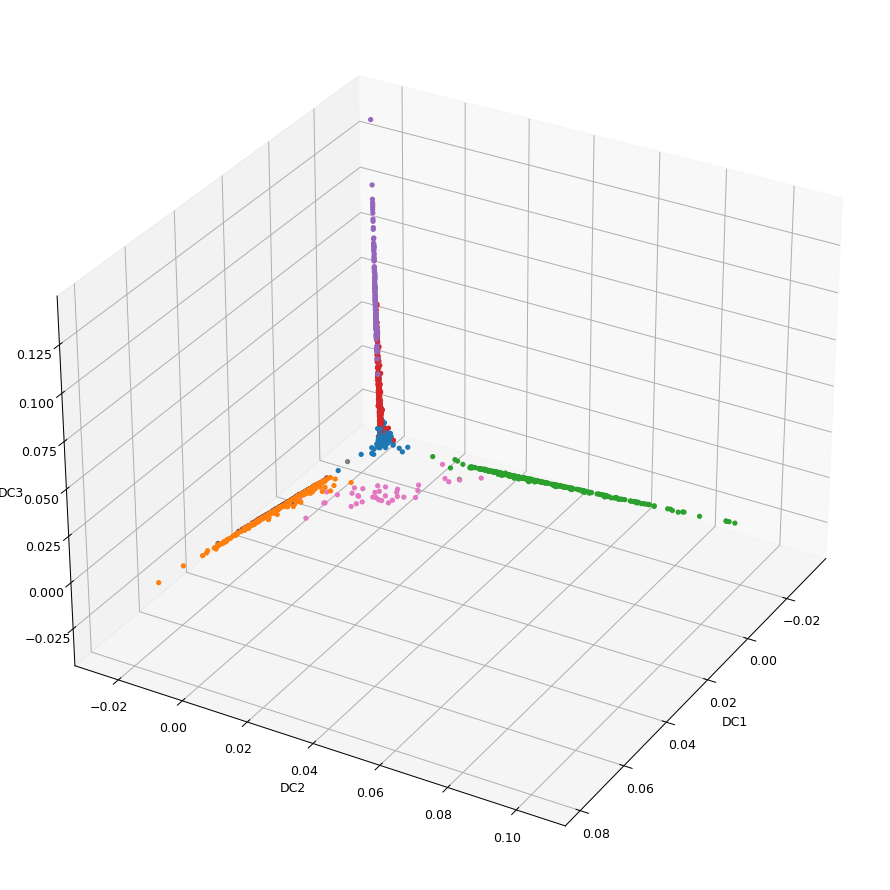

In [34]:
elev = 30 
azim = 30
f.plot_diffmap(dMap, c = [f'C{i}' for i in label_int], elev = elev, azim = azim)

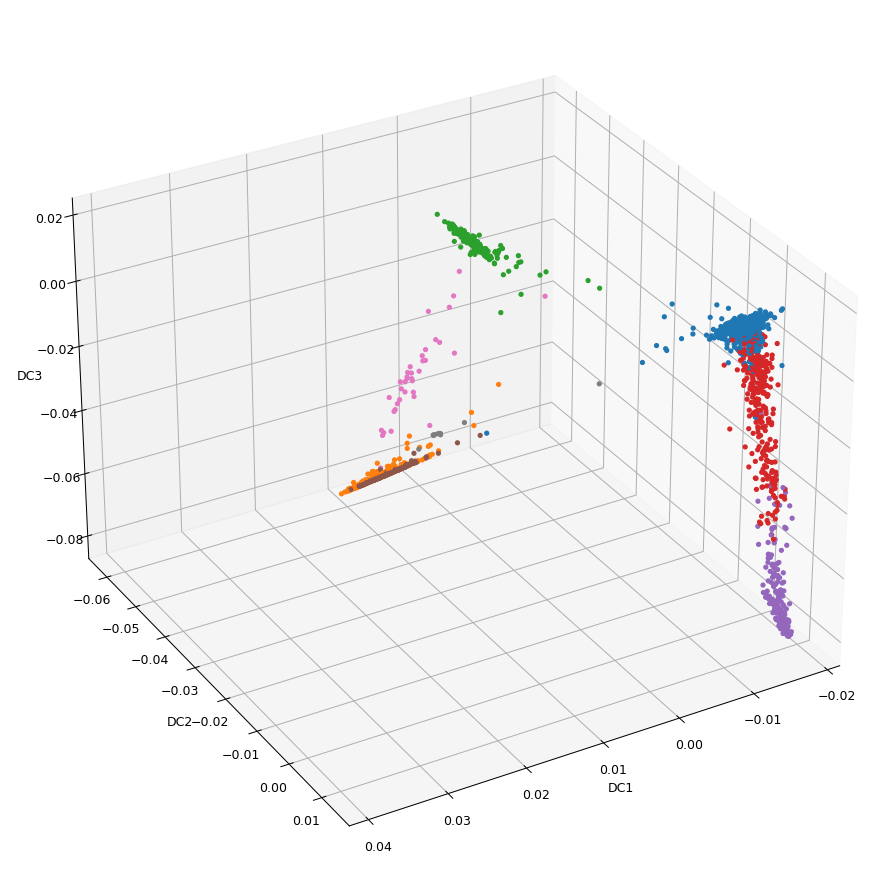

In [35]:
elev = 30
azim = 60
f.plot_diffmap(dmap2,c = [f'C{i}' for i in label_int], azim = azim, elev = elev)